In [47]:
import pathlib
import pylab as plt

#from matplotlib import pyplot as plt
import numpy as np
from numpy import unique
from numpy import where
import pandas as pd
import matplotlib
import seaborn as sns
import sys
import warnings
warnings.filterwarnings('ignore')

In [48]:
sns.set_style('white')

In [49]:
PRJ='PRJCA002517'
BASE_PATH='/mnt/8TB_2/Data/Assembly/'
ASSEMBLER='minimap2'
DATA_PATH=f'{BASE_PATH}{PRJ}/'
PLOT_PATH=DATA_PATH+'general_plots/'
PLOT_EXT='_x_sr_secondary_no_ncbi_mt_20220505_minimap2_gatk_sorted_marked_coverage.out_taxa.csv'

ITERATION=0
PARAMS='sr'
ABS_MIN_COV=10
FILTER_CUT=50
#PARAMS='default'

In [50]:
SRAs=['CRR477154','CRR477155','CRR477156','CRR477157']

In [51]:
sample_names=['A96','A97','A98','A100']

In [52]:
def get_alignments(truncate_at_min=True):
    frames=[]
    for sra in SRAs:
        df=pd.read_csv(BASE_PATH+PRJ+'/'+sra+'/'+ASSEMBLER+'/'+sra+PLOT_EXT)
        df = df.sort_values(by=['coverage'], ascending=False)
        if truncate_at_min:
            df = df[df['coverage'] >= ABS_MIN_COV] 
        df.insert(0, 'SRA', sra)
        idx=SRAs.index(sra)
        sample_name=sample_names[idx]
        df['sample_name']=[sample_name]*len(df)
        df=df.drop(['Unnamed: 0'], axis=1)
        total_mt_count = df['numreads'].sum()
        df['total_mt_reads'] = total_mt_count
        df['frac_mt'] = df['numreads'].div(total_mt_count).round(4)
        df = df.drop_duplicates(subset='taxa', keep="first")
        frames.append(df)
    df_all=pd.concat(frames, ignore_index=True)
    return df_all

df_all=get_alignments()
df_all.shape

(58, 14)

In [53]:
df_all.head()

,SRA,#rname,startpos,endpos,numreads,covbases,coverage,meandepth,meanbaseq,meanmapq,taxa,sample_name,total_mt_reads,frac_mt
0,CRR477154,NC_036434.1,1,16577,73162,16548,99.8251,602.246000,36.4,18.50,Manis culionensis,A96,259819,0.2816
1,CRR477154,NC_026781.1,1,16576,106322,16508,99.5898,891.228000,36.4,8.05,Manis javanica,A96,259819,0.4092
2,CRR477154,NC_016008.1,1,16578,74732,16283,98.2205,619.651000,36.3,4.66,Manis pentadactyla,A96,259819,0.2876
3,CRR477154,NC_036433.1,1,16576,2487,14967,90.2932,17.514100,36.1,14.20,Manis crassicaudata,A96,259819,0.0096
4,CRR477154,NC_036064.1,1,16540,117,2943,17.7932,0.686518,35.6,6.38,Manis gigantea,A96,259819,0.0005


In [54]:
### filter to => n%
df_cut = df_all.loc[df_all['coverage'] >=FILTER_CUT]

In [55]:
total_mt_count = df_cut['numreads'].sum()
print(total_mt_count)
df_cut['total_cut_mt_reads'] = total_mt_count
df_cut['cut_frac_mt'] = df_cut['numreads'].div(total_mt_count).round(4)

666843


In [56]:
df_pivot=df_cut.pivot_table(index='sample_name', columns='taxa', values='coverage')

In [58]:
df_pivot=df_pivot.reindex(['A96','A97','A98','A100'])

In [59]:
df_pivot.head()

taxa,Chlorocebus sabaeus,Homo heidelbergensis,Homo sapiens,Homo sp.,Manis crassicaudata,Manis culionensis,Manis javanica,Manis pentadactyla,Neophocaena asiaeorientalis,Neophocaena phocaenoides
sample_name,,,,,,,,,,
A96,NaN,NaN,NaN,NaN,90.2932,99.8251,99.5898,98.2205,NaN,NaN
A97,96.7251,NaN,100.0,NaN,73.3470,98.4798,99.3967,98.4377,65.9017,64.0220
A98,97.4260,NaN,100.0,NaN,90.4621,98.8297,98.9020,99.0107,69.3561,64.8886
A100,97.2689,63.5804,100.0,60.5914,NaN,NaN,98.9744,96.9478,60.2746,54.2142


In [60]:
def get_samples(y_labels, df_datasets):
    y_names=[]
    for sra in y_labels:
        y_names.append(df_datasets.loc[df_datasets['SRA'] == sra.strip(), 'Name'].values[0])
    return y_names

In [61]:
def get_accessions(x_labels, df_accessions):
    x_codes=[]
    for accession in x_labels:
        x_codes.append(df_accessions.loc[df_accessions['Accession'] == accession.strip(), 'Code'].values[0])
    return x_codes

In [62]:
df_pivot=df_pivot.T
data=df_pivot.to_numpy()

y_labels=df_pivot.index.tolist()
x_labels=list(df_pivot.columns.values)

In [63]:
x_labels

['A96', 'A97', 'A98', 'A100']

In [64]:
y_names=y_labels
x_codes=x_labels

In [65]:
plot_data = np.ma.masked_equal(data[:,:], 0)

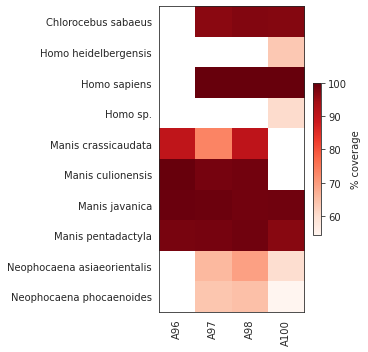

In [66]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(5,5))
#img=ax.imshow(plot_data, cmap=plt.cm.get_cmap("Reds"), interpolation="nearest", aspect='auto',norm=matplotlib.colors.LogNorm())
img=ax.imshow(plot_data, cmap=plt.cm.get_cmap("Reds"), interpolation="nearest", aspect='auto')

ax.set_xticks(list(range(len(x_codes))))
ax.set_xticklabels(x_codes,rotation=90)
ax.set_yticks(list(range(len(y_names))))
ax.set_yticklabels(y_names)

cbar=fig.colorbar(img, label='% coverage', shrink=0.5)

plt.tight_layout()
fig.savefig(PLOT_PATH+f"Mt_{PARAMS}_sample_name_{FILTER_CUT}_V2.png", bbox_inches='tight')

## Percent


In [67]:
df_frac=df_all.copy()
df_frac.shape

(58, 14)

In [68]:
### filter to => N%
df_frac = df_frac.loc[df_frac['coverage'] >=FILTER_CUT]
df_frac.shape

(28, 14)

In [69]:
df_frac.head()

,SRA,#rname,startpos,endpos,numreads,covbases,coverage,meandepth,meanbaseq,meanmapq,taxa,sample_name,total_mt_reads,frac_mt
0,CRR477154,NC_036434.1,1,16577,73162,16548,99.8251,602.2460,36.4,18.50,Manis culionensis,A96,259819,0.2816
1,CRR477154,NC_026781.1,1,16576,106322,16508,99.5898,891.2280,36.4,8.05,Manis javanica,A96,259819,0.4092
2,CRR477154,NC_016008.1,1,16578,74732,16283,98.2205,619.6510,36.3,4.66,Manis pentadactyla,A96,259819,0.2876
3,CRR477154,NC_036433.1,1,16576,2487,14967,90.2932,17.5141,36.1,14.20,Manis crassicaudata,A96,259819,0.0096
7,CRR477155,NC_012920.1,1,16569,19828,16569,100.0000,171.9180,34.6,31.70,Homo sapiens,A97,170629,0.1162


In [70]:
df_frac['frac_pct'] = df_frac['frac_mt']*100

In [71]:
df_pivot=df_frac.pivot_table(index='sample_name', columns='taxa', values='frac_pct')

In [72]:
df_pivot=df_pivot.reindex(['A96','A97','A98','A100'])

In [73]:
df_pivot.head()

taxa,Chlorocebus sabaeus,Homo heidelbergensis,Homo sapiens,Homo sp.,Manis crassicaudata,Manis culionensis,Manis javanica,Manis pentadactyla,Neophocaena asiaeorientalis,Neophocaena phocaenoides
sample_name,,,,,,,,,,
A96,NaN,NaN,NaN,NaN,0.96,28.16,40.92,28.76,NaN,NaN
A97,6.14,NaN,11.62,NaN,0.39,29.27,22.61,23.83,0.69,0.64
A98,1.54,NaN,10.23,NaN,1.18,30.97,23.75,25.80,0.97,0.89
A100,8.42,2.3,53.10,3.39,NaN,NaN,9.41,7.66,0.49,0.46


In [74]:
df_pivot=df_pivot.T
data=df_pivot.to_numpy()

y_labels=df_pivot.index.tolist()
x_labels=list(df_pivot.columns.values)

In [75]:
y_names=y_labels
x_codes=x_labels

In [76]:
plot_data = np.ma.masked_equal(data[:,:], 0)

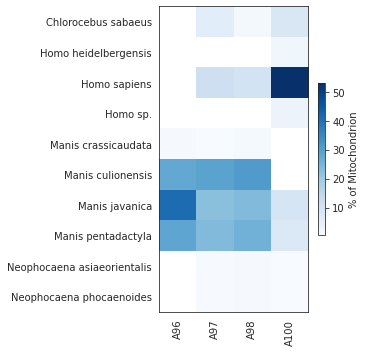

In [77]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(5,5))
#img=ax.imshow(plot_data, cmap=plt.cm.get_cmap("Blues"), interpolation="nearest", aspect='auto', \
#              norm=matplotlib.colors.LogNorm(), vmin = 0.001, vmax = 100)
img=ax.imshow(plot_data, cmap=plt.cm.get_cmap("Blues"), interpolation="nearest", aspect='auto')

ax.set_xticks(list(range(len(x_codes))))
ax.set_xticklabels(x_codes,rotation=90)
ax.set_yticks(list(range(len(y_names))))
ax.set_yticklabels(y_names)


cbar=fig.colorbar(img, label='% of Mitochondrion', shrink=0.5)

plt.tight_layout()
fig.savefig(PLOT_PATH+f"Mt_{PARAMS}_sample_name_{FILTER_CUT}_cut_fraction_of_Mt_V2.png", bbox_inches='tight')